In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('StudentsPerformance.csv')

In [5]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.isnull().sum().sum()

0

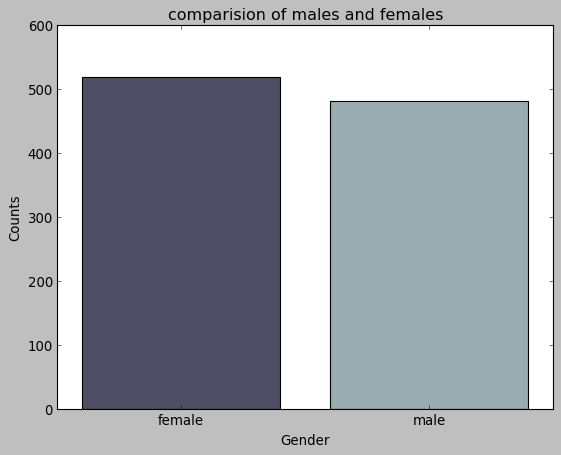

In [12]:
#Visualisizing number of males and females in the dataset
plt.rcParams['figure.figsize']=(15,12)
plt.style.use('_classic_test')
sns.countplot(data['gender'],palette='bone')
plt.title('comparision of males and females',fontweight=30)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

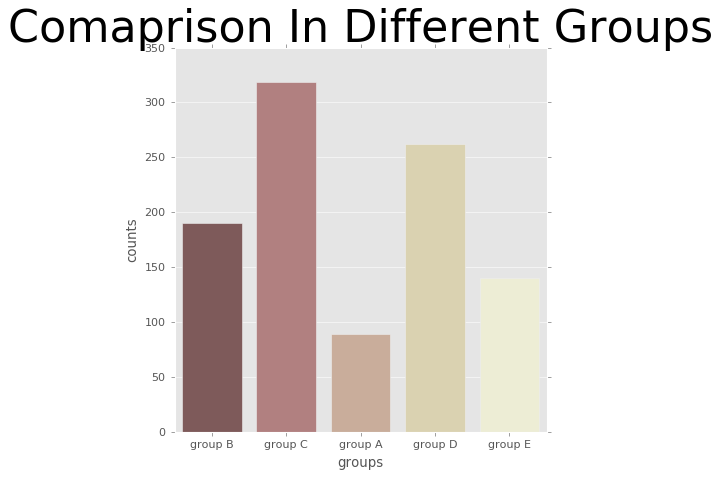

In [17]:
#visulaizing different groups 
plt.rcParams['figure.figsize']=(6,6)
plt.style.use('ggplot')
sns.countplot(data['race/ethnicity'],palette='pink')
plt.title('Comaprison In Different Groups',fontweight=30,fontsize=40)
plt.xlabel('groups')
plt.ylabel('counts')
plt.show()

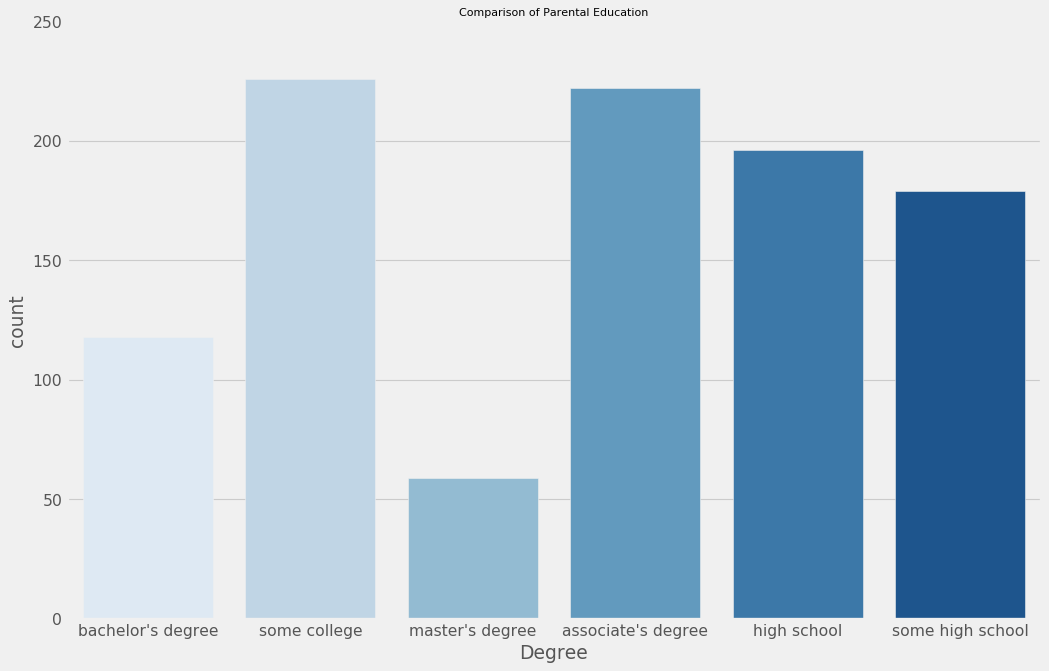

In [22]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (14, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 15, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

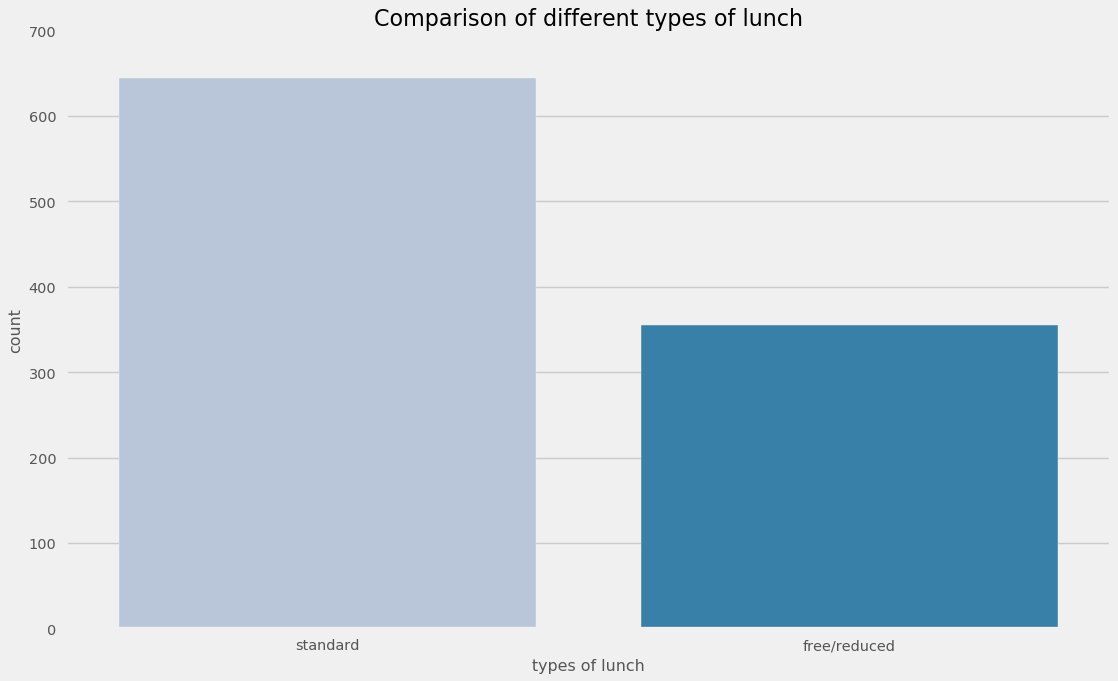

In [24]:
# visualizing different types of lunch 

plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


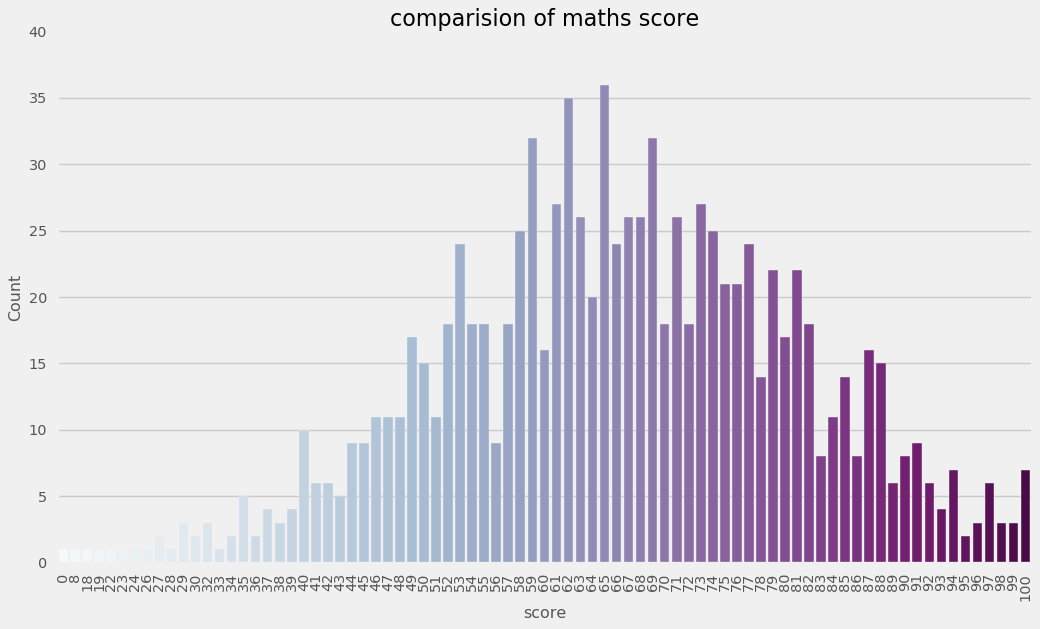

In [26]:
#visualizing maths score
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('tableau-colorblind10')
sns.countplot(data['math score'],palette='BuPu')
plt.title('comparision of maths score',fontweight=30,fontsize=20)
plt.xlabel('score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

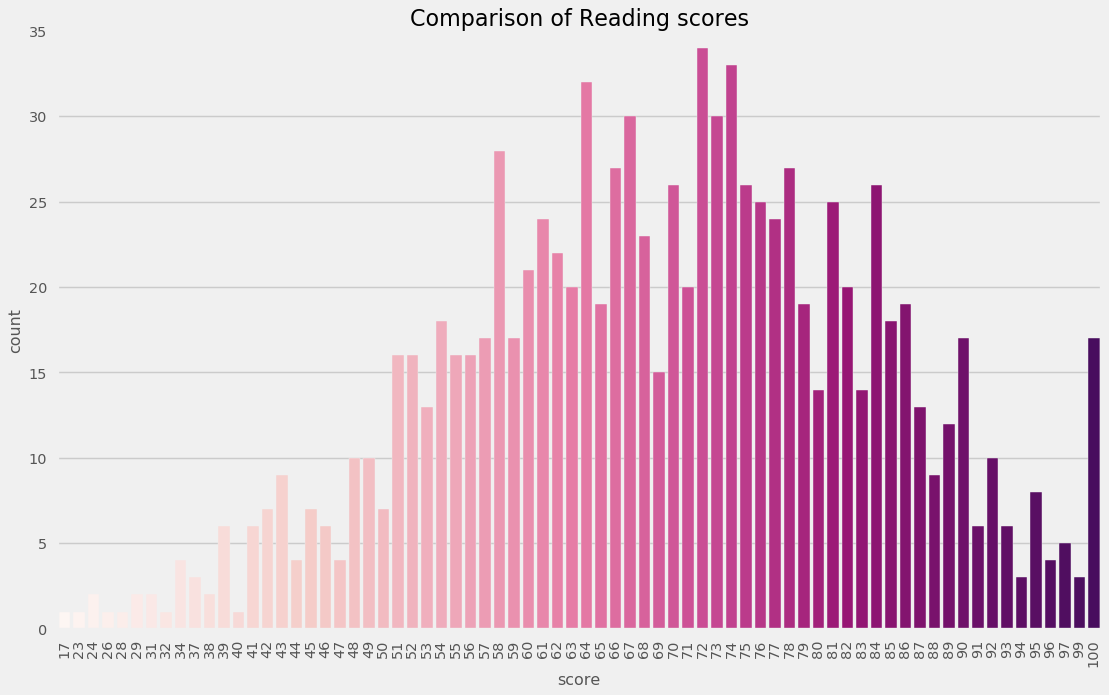

In [27]:
## visualizing reading score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['reading score'], palette = 'RdPu')
plt.title('Comparison of Reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

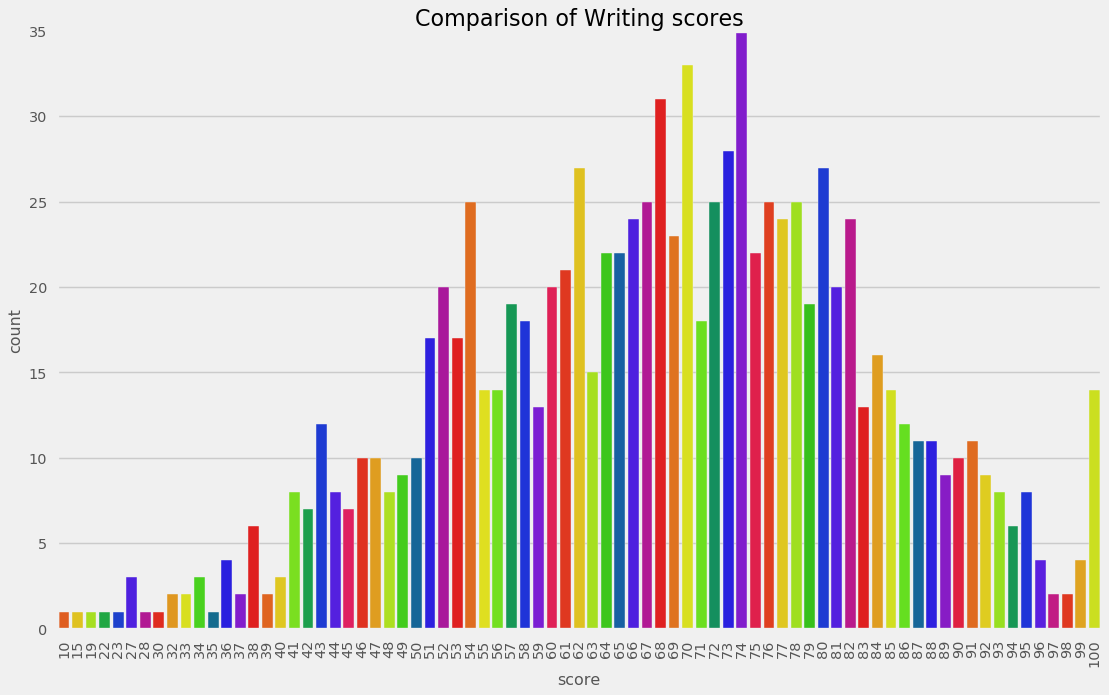

In [28]:
# visualizing writing score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'], palette = 'prism')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

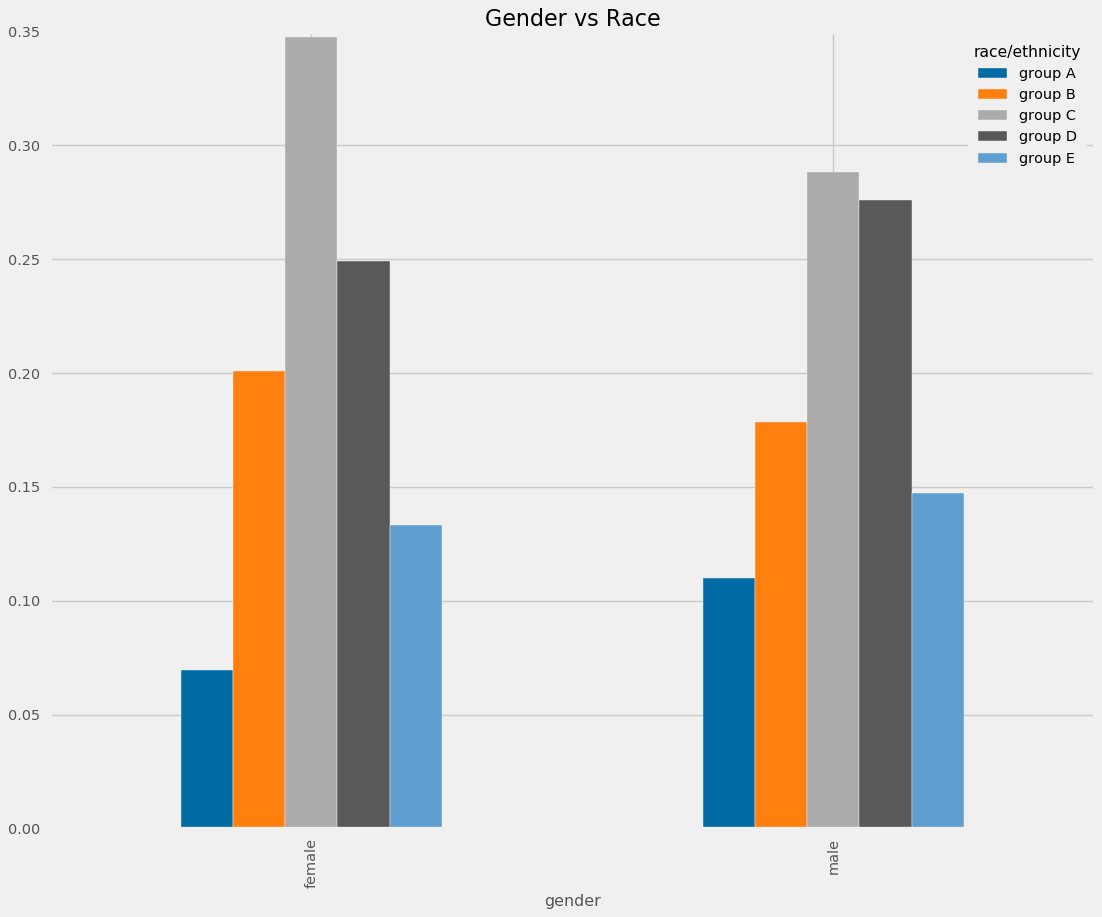

In [29]:
#gender vs the race/groups
plt.rcParams['figure.figsize']=(15,12)
x = pd.crosstab(data['gender'],data['race/ethnicity'])
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title('Gender vs Race',fontweight=30,fontsize=20)
plt.show()

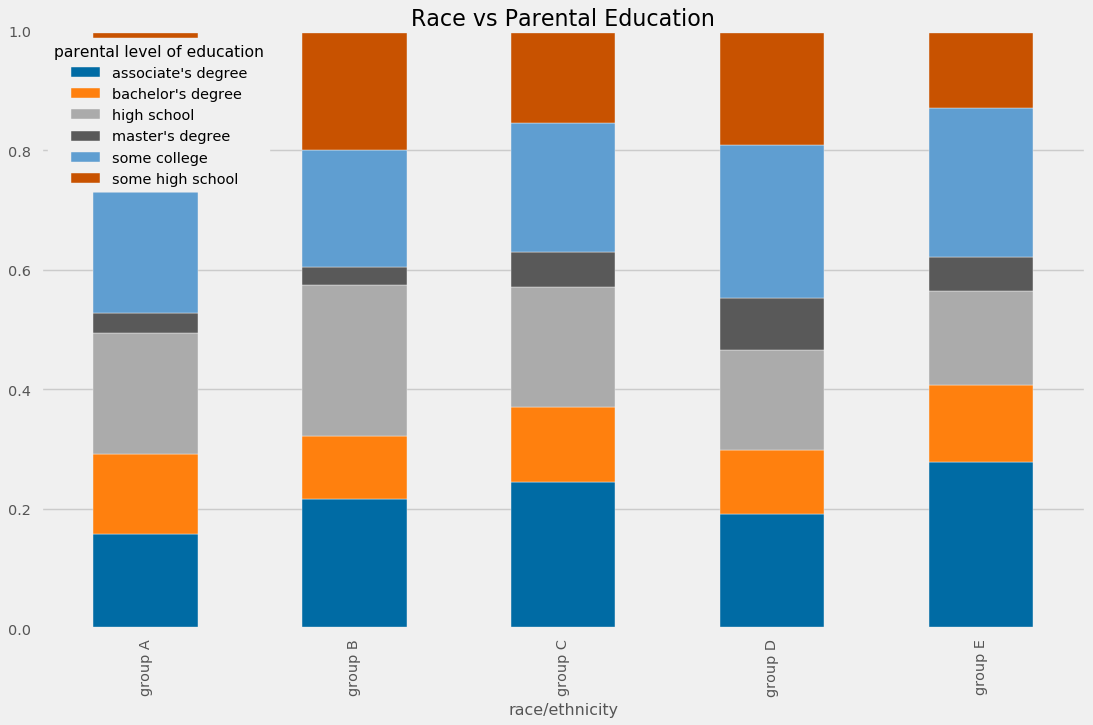

In [31]:
#race vs parental education

plt.rcParams['figure.figsize']= (15,9)
x=pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Race vs Parental Education',fontweight=30,fontsize=20)
plt.show()

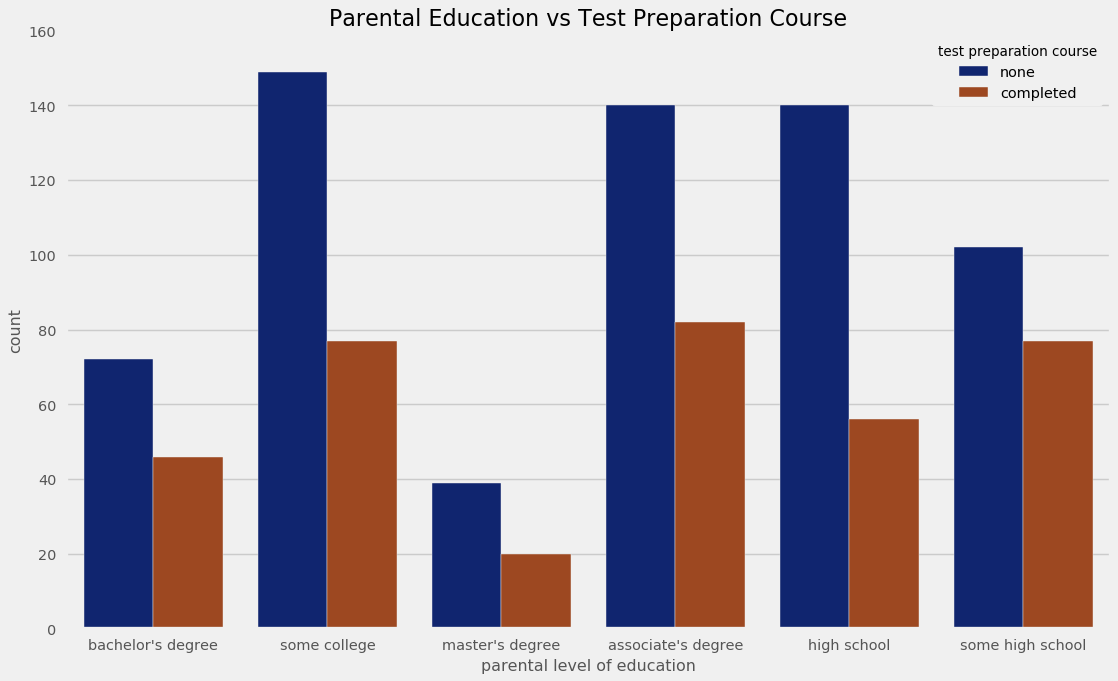

In [32]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

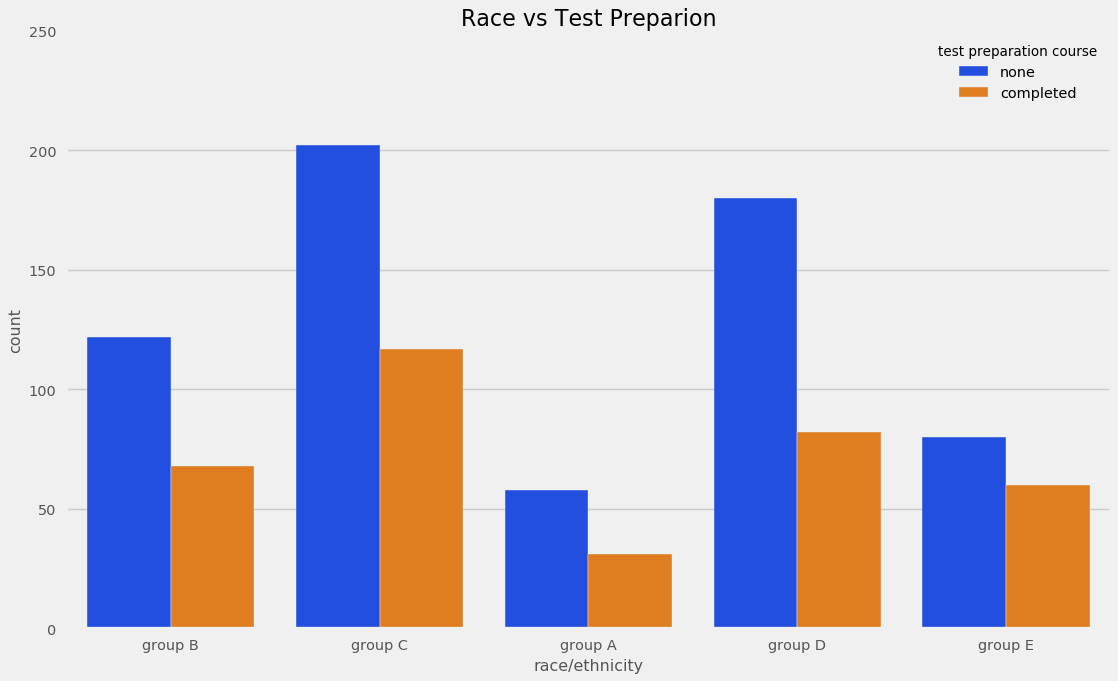

In [33]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()


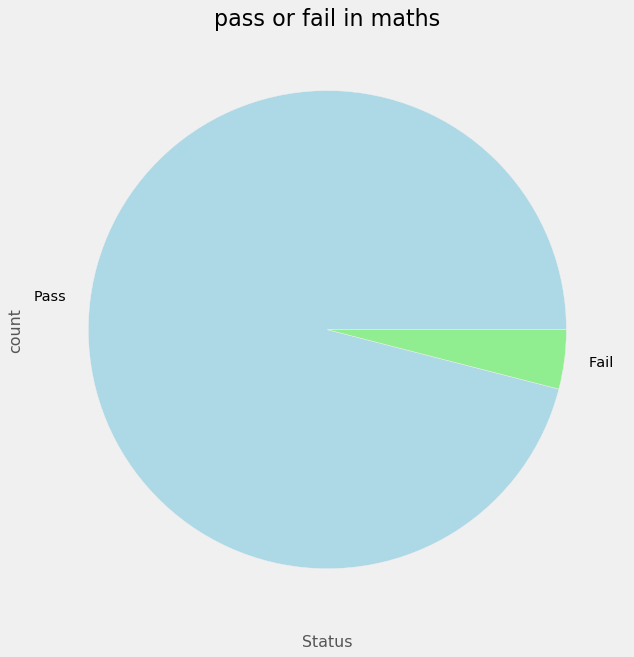

In [45]:
#feature engineering ,my favourite part :)
#lets set some pass marks 
passmarks=40
#creating a new column to check how many have passed
data['pass_math']=np.where(data['math score']<passmarks,'Fail','Pass')
data['pass_math'].value_counts().plot.pie(colors=['lightblue','lightgreen'])
plt.title("pass or fail in maths",fontweight=30,fontsize=20)
plt.xlabel('Status')
plt.ylabel('count')
plt.show()

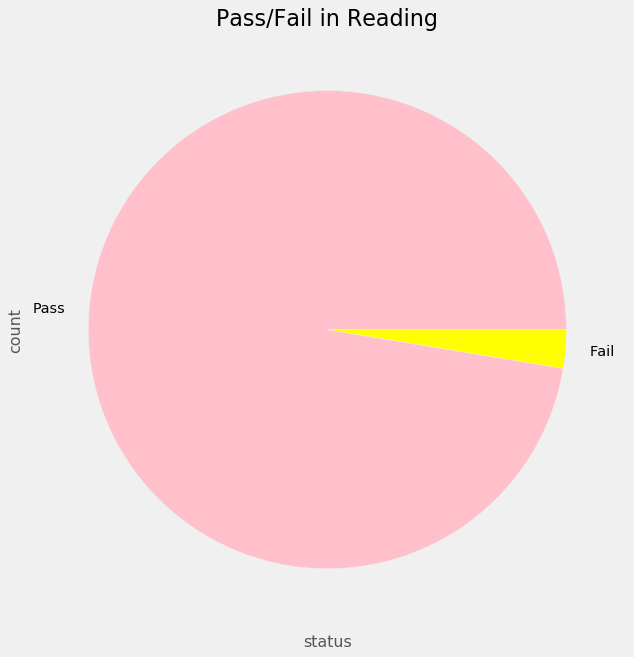

In [46]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()


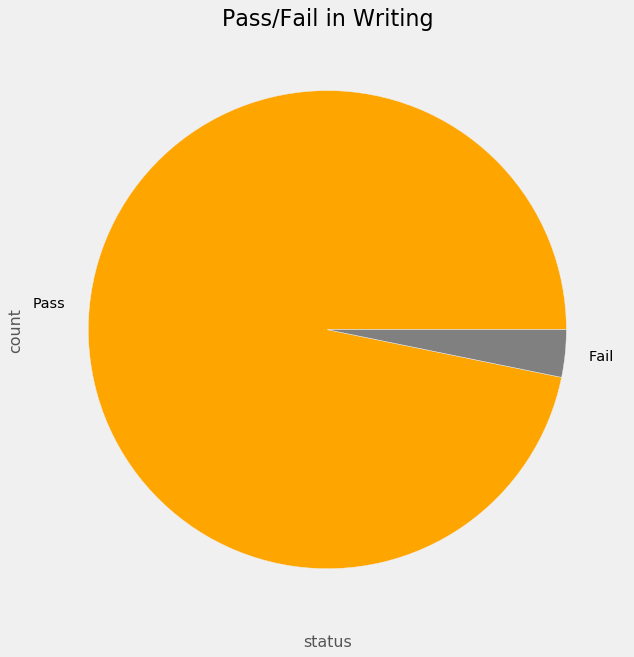

In [47]:
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()


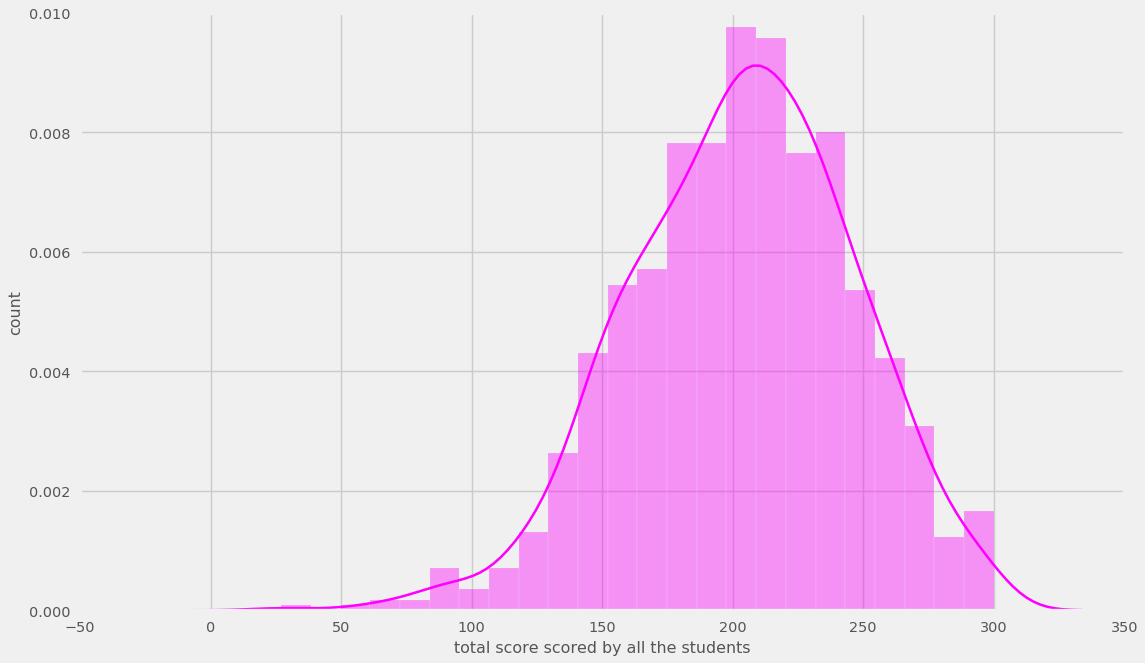

In [48]:
import warnings
warnings.filterwarnings('ignore')
data['total score']= data['math score']+data['writing score']+data['reading score']
sns.distplot(data['total score'],color='magenta')
plt.xlabel('total score scored by all the students')
plt.ylabel('count')
plt.show()

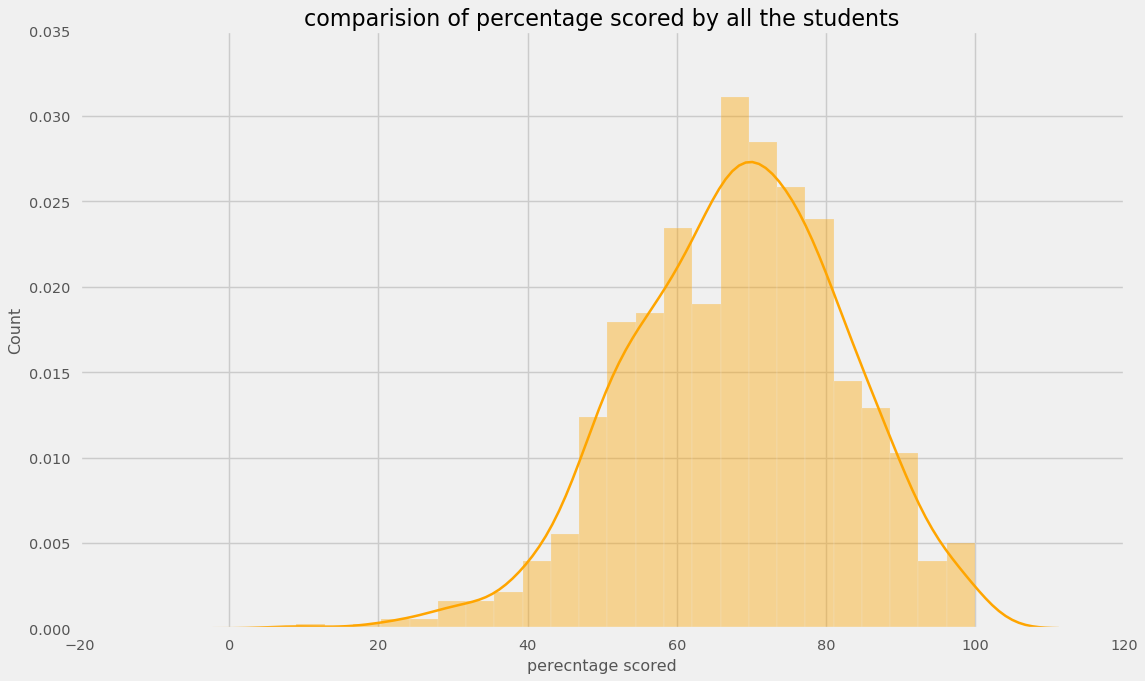

In [50]:
from math import *
import warnings
warnings.filterwarnings('ignore')
data['percentage']=data['total score']/3
for i in range(0,1000):
    data['percentage'][i] = ceil(data['percentage'][i])
plt.rcParams['figure.figsize'] = (15,9)
sns.distplot(data['percentage'],color='orange')
plt.title('comparision of percentage scored by all the students',fontweight=30,fontsize=20)
plt.xlabel('perecntage scored')
plt.ylabel('Count')
plt.show()


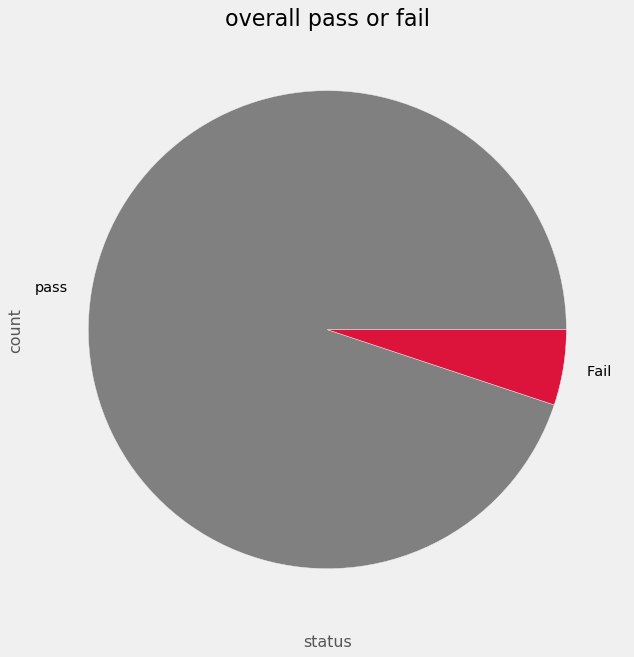

In [51]:
#checking which student is fail overall
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math']=='Fail'or x['pass_reading']=='Fail' or x['pass_writing']=='Fail'
                           else 'pass',axis=1)
data['status'].value_counts(dropna=False).plot.pie(colors=['grey','crimson'])
plt.title('overall pass or fail',fontweight=30,fontsize=20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [61]:
#assigning the grades
def getgrade(percentage,status):
    if status=='Fail':
        return 'E'
    if (percentage>=90):
        return 'O'
    if (percentage>=80):
        return 'A'
    if (percentage>=70):
        return 'B'
    if (percentage>=60):
        return 'C'
    if (percentage>=40):
        return 'D'
    else:
        return 'E'
data['Grades'] = data.apply(lambda x : getgrade(x['percentage'],x['status']),axis=1)

In [62]:
data['Grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: Grades, dtype: int64

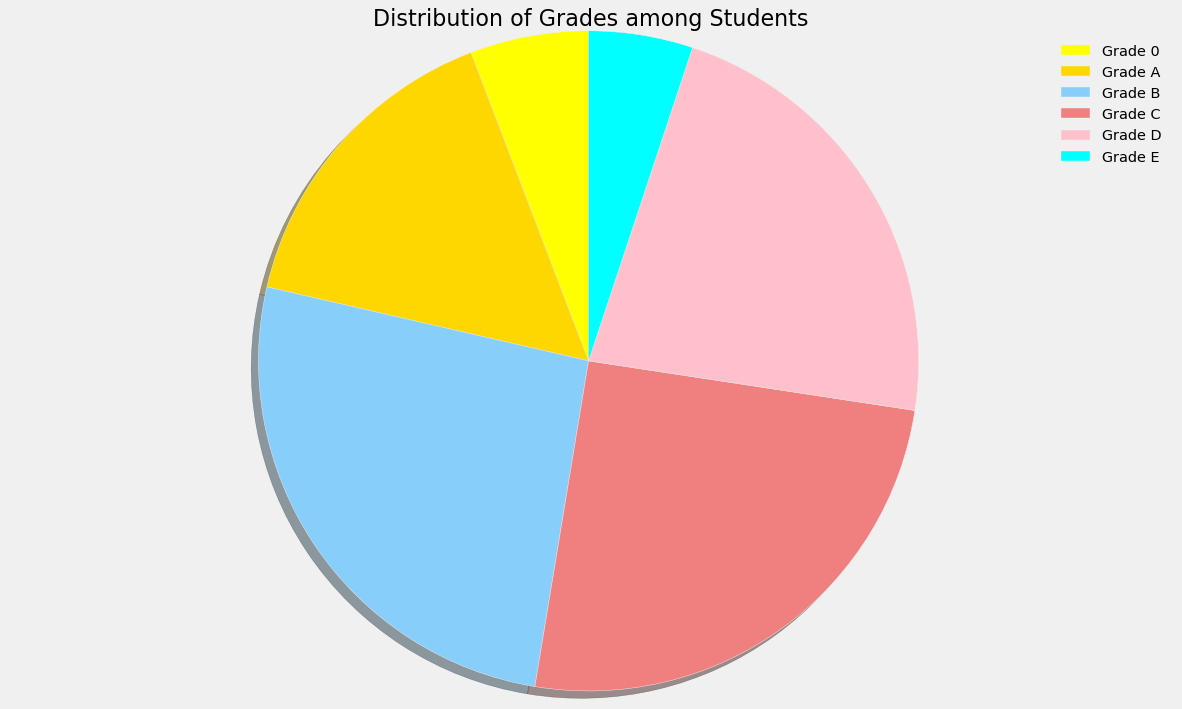

In [63]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()


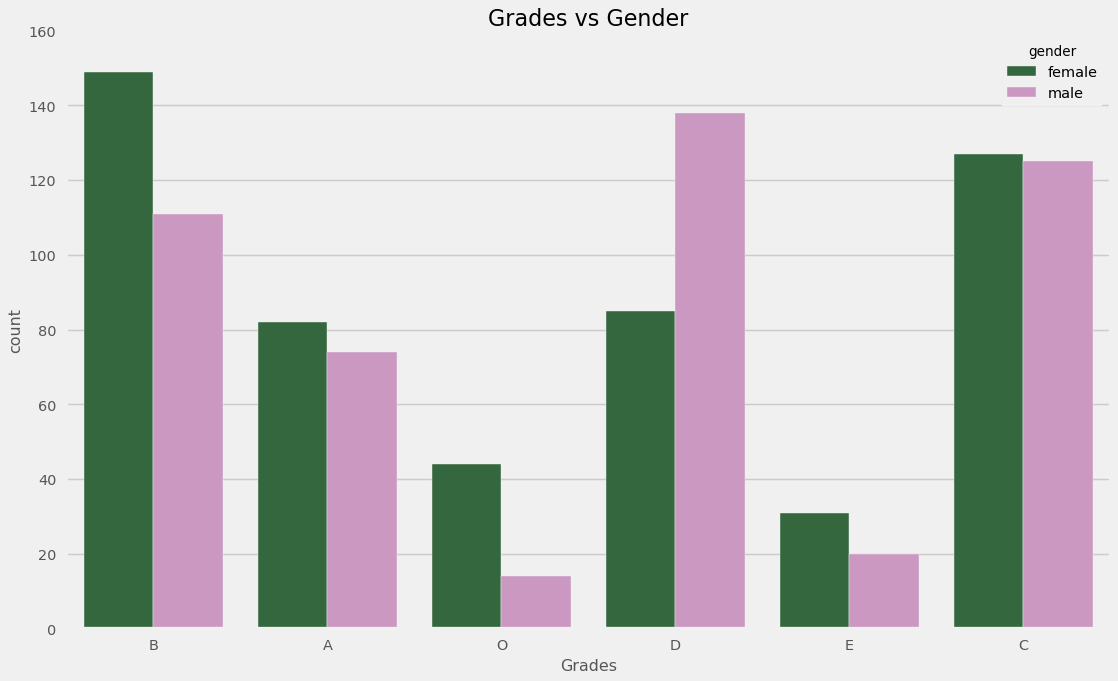

In [66]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['Grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()


In [67]:
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total score,percentage,status,Grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B


In [70]:
#label encoding required for efficient working of ml algorithms
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #instance
data['test preparation course'] =le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['race/ethnicity'] = data['race/ethnicity'].replace('group A',1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B',2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C',3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D',4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E',5)
# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])
# label encoding for status
data['status'] = le.fit_transform(data['status'])

In [71]:
x = data.iloc[:,:14]
y = data.iloc[:,14]
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [72]:
# spliting dataset into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(750, 14)
(250, 14)
(250,)
(750,)


In [73]:
#scaling the data(thats too important actually)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
#feeding the independent varibale into standardizer
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [74]:
#modelling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [75]:
y_pred

array(['C', 'D', 'C', 'D', 'A', 'D', 'C', 'B', 'D', 'C', 'E', 'C', 'B',
       'D', 'D', 'D', 'B', 'D', 'D', 'D', 'D', 'C', 'B', 'D', 'B', 'D',
       'A', 'D', 'E', 'C', 'D', 'A', 'D', 'A', 'D', 'B', 'A', 'A', 'B',
       'D', 'C', 'C', 'C', 'D', 'B', 'C', 'C', 'C', 'D', 'C', 'C', 'D',
       'D', 'B', 'C', 'B', 'A', 'B', 'B', 'B', 'A', 'D', 'D', 'C', 'B',
       'C', 'E', 'C', 'D', 'C', 'D', 'A', 'D', 'C', 'D', 'B', 'B', 'D',
       'C', 'D', 'C', 'D', 'D', 'D', 'D', 'D', 'B', 'D', 'E', 'D', 'B',
       'B', 'D', 'D', 'C', 'D', 'D', 'D', 'D', 'A', 'D', 'C', 'B', 'C',
       'D', 'D', 'B', 'D', 'B', 'D', 'D', 'A', 'B', 'B', 'C', 'D', 'A',
       'D', 'D', 'C', 'C', 'D', 'E', 'C', 'E', 'D', 'B', 'D', 'B', 'C',
       'D', 'O', 'D', 'D', 'C', 'B', 'C', 'D', 'D', 'B', 'D', 'D', 'B',
       'D', 'B', 'C', 'C', 'D', 'B', 'D', 'D', 'D', 'C', 'C', 'B', 'C',
       'B', 'B', 'B', 'B', 'D', 'D', 'D', 'D', 'C', 'B', 'C', 'E', 'D',
       'A', 'C', 'C', 'D', 'B', 'D', 'E', 'C', 'C', 'C', 'B', 'C

In [76]:
data.tail(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total score,percentage,status,Grades
750,1,4,5,1,0,71,69,68,1,1,1,208,70.0,1,B
751,1,5,4,1,1,68,72,65,1,1,1,205,69.0,1,C
752,1,3,3,0,0,79,77,75,1,1,1,231,77.0,1,B
753,0,3,5,1,0,77,90,85,1,1,1,252,84.0,1,A
754,1,3,0,0,1,58,55,53,1,1,1,166,56.0,1,D
755,0,5,0,1,1,84,95,92,1,1,1,271,91.0,1,O
756,1,4,4,1,1,55,58,52,1,1,1,165,55.0,1,D
757,1,5,1,0,0,70,68,72,1,1,1,210,70.0,1,B
758,0,4,4,0,0,52,59,65,1,1,1,176,59.0,1,D
759,1,2,4,1,0,69,77,77,1,1,1,223,75.0,1,B


In [78]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           A       0.47      0.25      0.33        32
           B       0.56      0.42      0.48        72
           C       0.36      0.40      0.38        58
           D       0.62      1.00      0.76        61
           E       1.00      0.88      0.93        16
           O       1.00      0.18      0.31        11

   micro avg       0.55      0.55      0.55       250
   macro avg       0.67      0.52      0.53       250
weighted avg       0.56      0.55      0.53       250

[[ 8 24  0  0  0  0]
 [ 0 30 41  1  0  0]
 [ 0  0 23 35  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0  2 14  0]
 [ 9  0  0  0  0  2]]


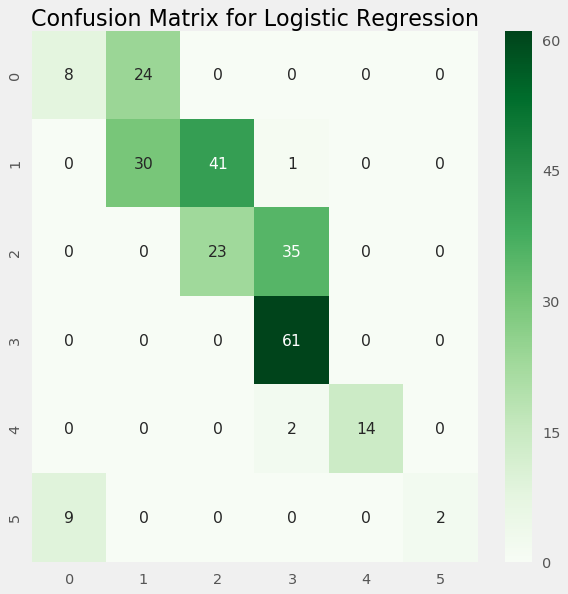

In [79]:
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression',fontweight=30,fontsize=20)
plt.show()

In [80]:
#the results with logistic regression were not that good...lets use randomforest
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.592


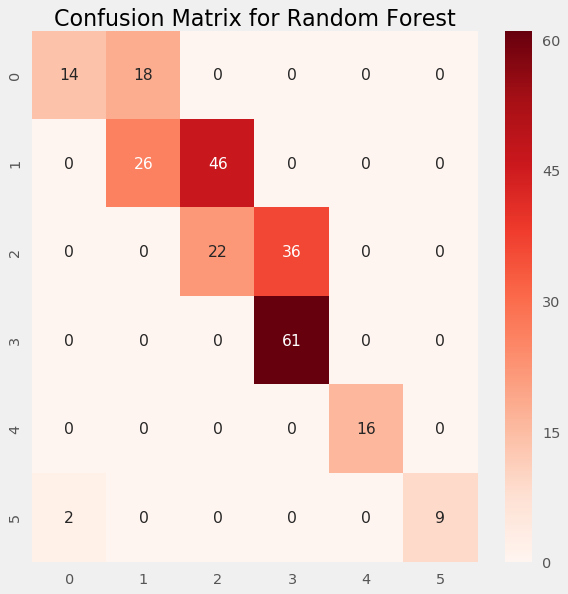

In [81]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

           A       0.88      0.44      0.58        32
           B       0.59      0.36      0.45        72
           C       0.32      0.38      0.35        58
           D       0.63      1.00      0.77        61
           E       1.00      1.00      1.00        16
           O       1.00      0.82      0.90        11

   micro avg       0.59      0.59      0.59       250
   macro avg       0.74      0.67      0.68       250
weighted avg       0.62      0.59      0.58       250

[[14 18  0  0  0  0]
 [ 0 26 46  0  0  0]
 [ 0  0 22 36  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0  0 16  0]
 [ 2  0  0  0  0  9]]
